- 学修番号: 21445095
- 氏名: 小田龍司

# 課題 2.2　クラスタ分析

課題 2.2 クラスタ分析は、各自の興味に沿ったデータセットを取得し、分析してください。
クラスタ分析は、教師なし学習であり、正解ラベルはありません。
結果の解釈にはデータの理解が必要となりますので、興味があるデータについて分析してみてください。

分析は、以下の 2.2.1 ~ 2.2.4 について行ってください。

- 2.2.1 データセットの取得
- 2.2.2 階層的クラスタ分析
- 2.2.3 非階層的クラスタ分析
- 2.2.4 考察

### 2.2.1 データセットの取得、読み込み

2.2.1 では以下を行うこと。

- データセットの取得方法を記載
  - 取得、実行し、結果を確認できるように記載すること
- データセットの説明を記載
  - 処理内容を理解できるように説明を記載すること
- データセットの読み込み
  - （必要ならば）処理対象となるように加工

[人口統計](https://www.stat.go.jp/data/nenkan/70nenkan/02.html)
総務省HPより都道府県別の人口が記載されたエクセルをダウンロードし、余計なセルや時期のデータを省いたCSVを作成
2019年時点のデータ

[酒類販売量統計](https://www.nta.go.jp/publication/statistics/kokuzeicho/sake2019/shuzei.htm)
国税庁HPより酒類の販売量(kl)のエクセルをダウンロード。余計なセルを削除したCSVを作成
2019年時点のデータ

カテゴリは下記の通り

+ "清   酒　Sake"	
+ "合成清酒　Sake compound"	
+ "連続式蒸留焼酎　Continuous distillation Japanese spirits (shochu)"
+ "単式蒸留焼酎　Simple system distillation Japanese spirits (shochu)"	
+ "み り ん　Mirin(rice cooking wine)"	
+ "ビ ー ル　Beer"	
+ "果実酒　Fruit wine"
+ "甘  味　果実酒　Sweet Fruit wine"	
+ "ウイスキー　Whisky"	
+ "ブランデー　Brandy"	
+ "発泡酒　Sparkling liquor"
+ "原料用アルコール・スピリッツ　Alcohol for material・Spirits"
+ "リキュール　Liqueur"	
+ "そ の 他　Others"
													
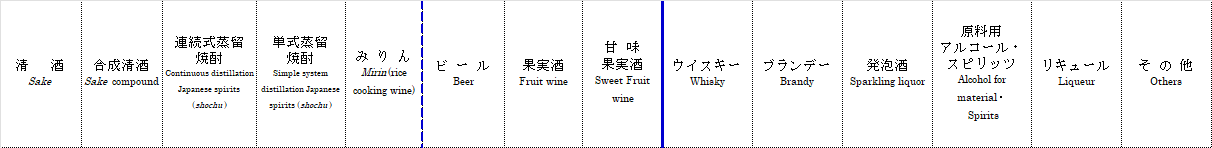

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# データ取得
# indexに共通であるPrefectureを設定
population = pd.read_csv('data/2019_population.csv', sep=',', index_col=0).dropna()
sake = pd.read_csv('data/08_suryo.csv', sep=',', index_col=0).dropna()

# 飲用の酒および消費量の多い種類だけに絞り、Prefectureを軸に人口とInnerJoinする
df = pd.concat([
    sake.drop(['Sake_compound','Sweet_Fruit_wine', 'Brandy', 'Mirin_rice_cooking_wine', 'Alcohol_for_material/Spirits', 'Others'], axis=1),    
    population.population,
    ],
    axis=1,
    join='inner')

# 人口を数値化しておく
df['population'] = df['population'].str.replace(',', '').astype(int)

# コンマ除去とInt型へ変換
for col in df:
    if(col == 'population'): continue
    # kl -> l へ変換
    df[col] = df[col].str.replace(',', '').astype(int) * 1000
    # 人口当たりの消費量に変換
    df[col] = df[col] / df['population']

# 確認
df = df.drop(['population'], axis=1)
df

,Sake,Continuous_distillation_Japanese_spirits_shochu,Simple_system_distillation_Japanese_spirits_shochu,Beer,Fruit_wine,Whisky,Sparkling_liquor,Liqueur
Prefecture,,,,,,,,
Hokkaido,3.716762,5.856000,1.083619,21.063429,3.031048,1.633905,5.599048,24.336381
Aomori,4.822632,5.313804,2.566613,17.653291,2.236758,1.666934,6.780096,26.475923
Iwate,4.850041,3.913610,2.883456,18.416463,2.330073,1.368378,4.960065,23.046455
Miyagi,4.440156,2.822637,3.173027,17.529055,2.656114,1.950997,4.806158,20.543365
Akita,6.872671,5.456522,2.250518,18.514493,2.002070,1.628364,5.629400,25.349896
Yamagata,5.870130,4.756957,2.052876,17.220779,2.323748,1.529685,3.815399,20.069573
Fukushima,5.503792,2.367822,3.663055,17.026002,1.860238,1.526002,4.456121,18.509751
Ibaraki,3.490559,2.531119,2.765385,13.115385,1.646853,1.376923,3.575175,18.246503
Tochigi,3.786970,3.189762,2.494312,13.966908,1.926060,1.419338,3.401241,17.556360


### 2.2.2 階層的クラスタ分析

2.2.2 では以下を行うこと。必要ならば他の処理を記載しても構わない。

- 樹形図（デンドログラム）の作成
- ヒートマップ付きの樹形図の作成

In [2]:
# 標準化： 平均値が0、標準偏差が1となるように変換
sc = StandardScaler()
sc.fit(df)

# 標準化したデータの DataFrame を作成
X = pd.DataFrame(sc.transform(df), index=df.index, columns=df.columns)

# - pd.options.display.float_format: 小数点以下の表示方法を指定
pd.options.display.float_format = '{:.2f}'.format

# 確認
print(X.std())
print(X.mean())
print(X.max())
print(X.min())
X

Sake                                                 1.01
Continuous_distillation_Japanese_spirits_shochu      1.01
Simple_system_distillation_Japanese_spirits_shochu   1.01
Beer                                                 1.01
Fruit_wine                                           1.01
Whisky                                               1.01
Sparkling_liquor                                     1.01
Liqueur                                              1.01
dtype: float64
Sake                                                  0.00
Continuous_distillation_Japanese_spirits_shochu       0.00
Simple_system_distillation_Japanese_spirits_shochu    0.00
Beer                                                 -0.00
Fruit_wine                                           -0.00
Whisky                                               -0.00
Sparkling_liquor                                      0.00
Liqueur                                              -0.00
dtype: float64
Sake                              

,Sake,Continuous_distillation_Japanese_spirits_shochu,Simple_system_distillation_Japanese_spirits_shochu,Beer,Fruit_wine,Whisky,Sparkling_liquor,Liqueur
Prefecture,,,,,,,,
Hokkaido,-0.18,2.80,-0.85,1.28,0.70,0.81,0.35,2.12
Aomori,0.69,2.35,-0.42,0.31,-0.01,0.89,1.11,2.96
Iwate,0.71,1.18,-0.32,0.53,0.07,0.16,-0.07,1.61
Miyagi,0.39,0.28,-0.24,0.27,0.36,1.59,-0.17,0.62
Akita,2.31,2.47,-0.51,0.56,-0.22,0.80,0.37,2.52
Yamagata,1.52,1.89,-0.57,0.19,0.07,0.56,-0.81,0.43
Fukushima,1.23,-0.10,-0.10,0.13,-0.35,0.55,-0.39,-0.18
Ibaraki,-0.36,0.03,-0.36,-0.98,-0.54,0.18,-0.96,-0.29
Tochigi,-0.13,0.58,-0.44,-0.74,-0.29,0.29,-1.08,-0.56


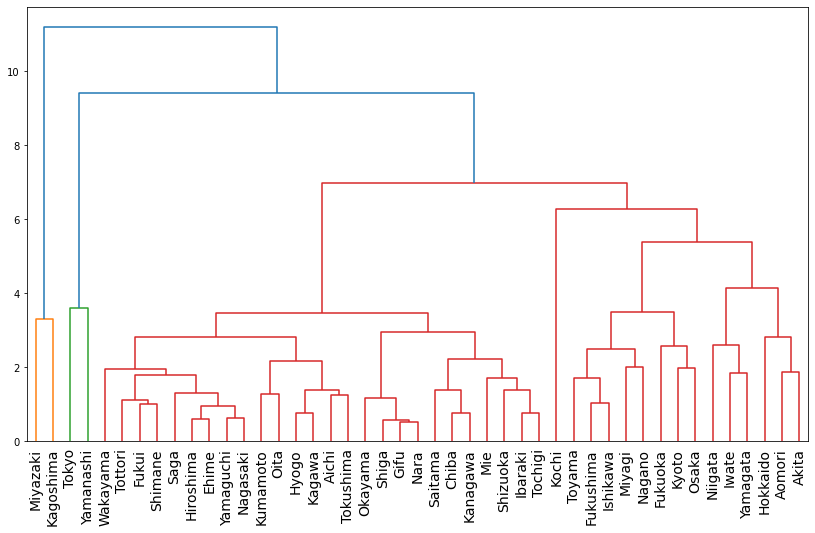

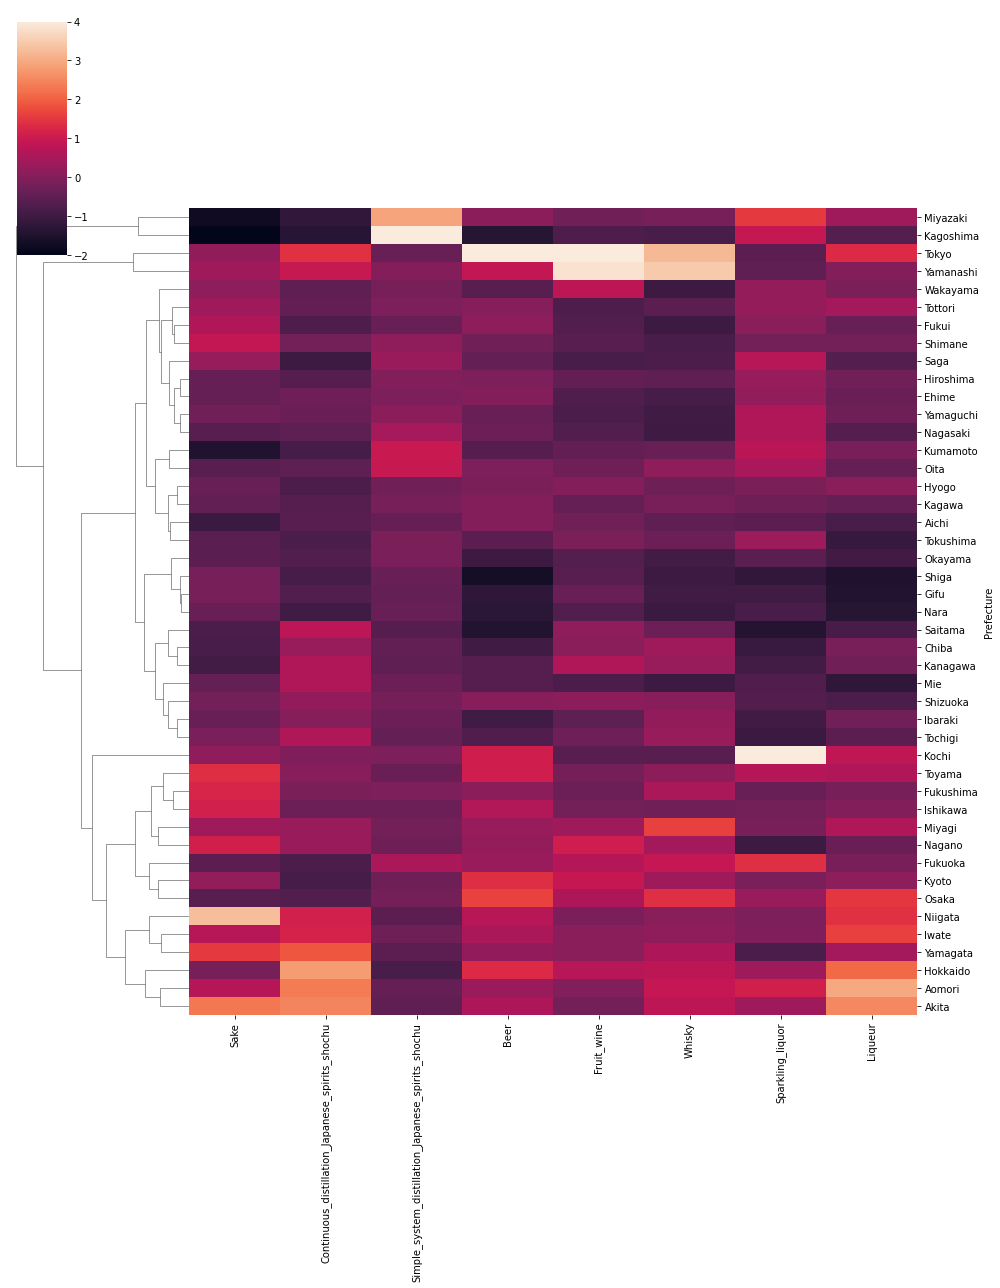

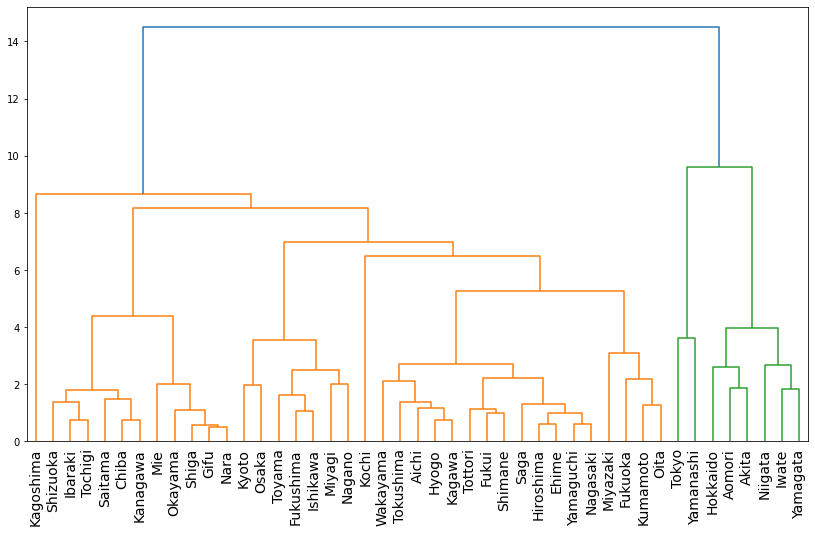

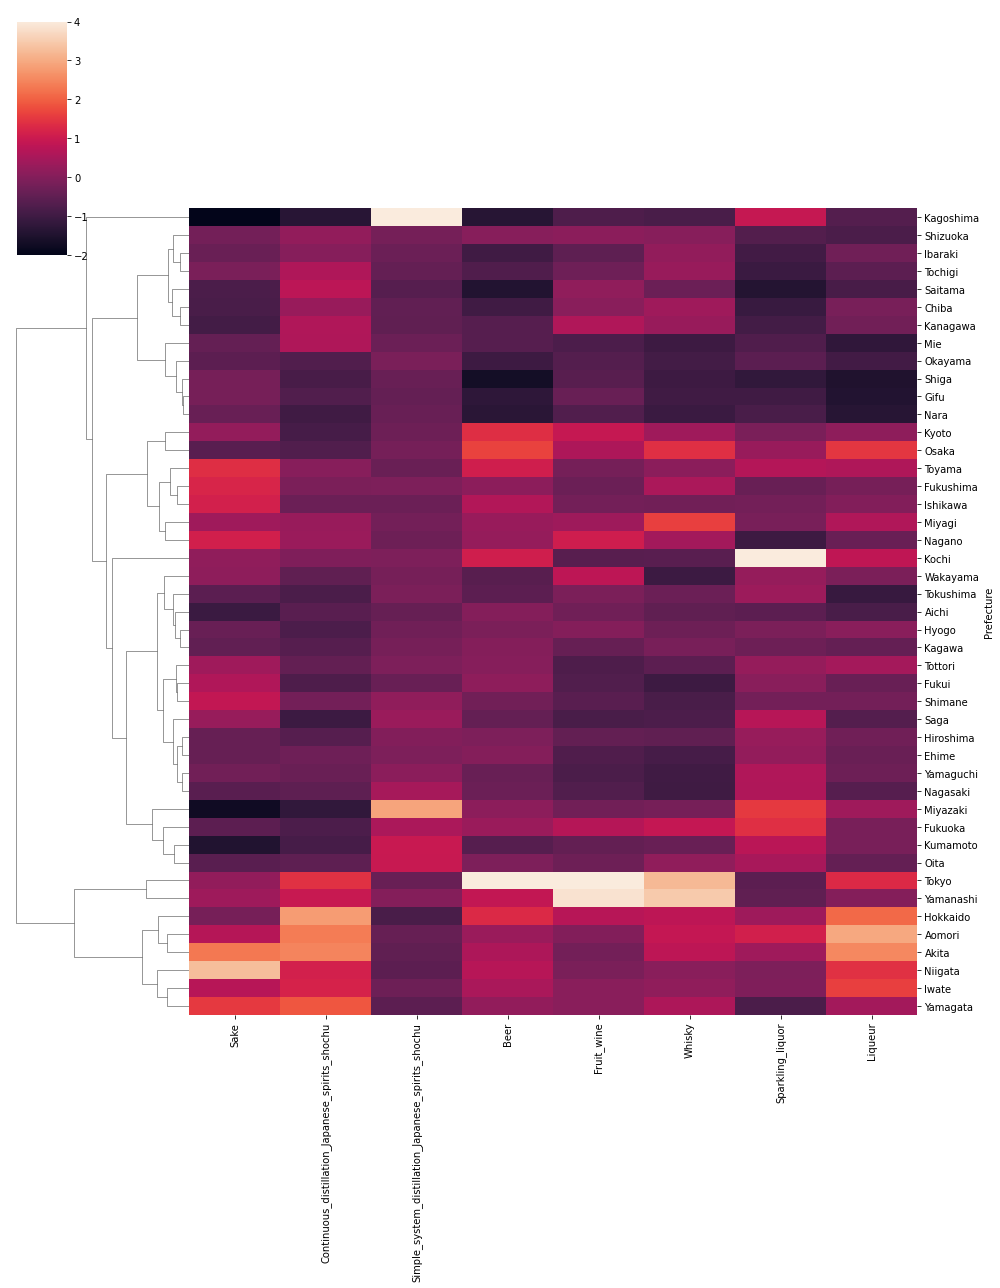

In [3]:
# 階層的凝集クラスタリング
# - method='complete' 最大非類似度
clusters = linkage(X.values, method='complete', metric='euclidean')
# 樹形図を作成
plt.figure(figsize=(14, 8))
dendr = dendrogram(clusters, labels=df.index, leaf_font_size=14)
# ヒートマップ付きの樹形図を作成
sns.clustermap(X, method='complete', metric='euclidean', figsize=(14, 18), col_cluster=False, vmin=-2, vmax=4)

# - method='ward' Ward法
clusters = linkage(X.values, method='ward', metric='euclidean')
# 樹形図を作成
plt.figure(figsize=(14, 8))
dendr = dendrogram(clusters, labels=df.index, leaf_font_size=14)
# ヒートマップ付きの樹形図を作成
sns.clustermap(X, method='ward', metric='euclidean', figsize=(14, 18), col_cluster=False, vmin=-2, vmax=4)

### 2.2.3 非階層的クラスタ分析

2.2.3 では以下を行うこと。必要ならば他の処理を記載しても構わない。

- クラスタ数の推定
  - エルボー法
  - シルエット分析
- KMeans法によるクラスタリング

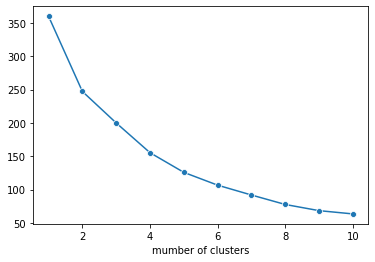

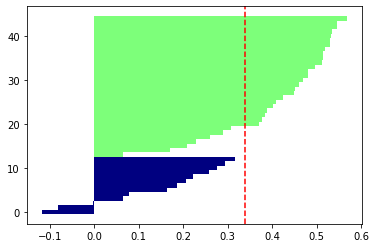

2 Clusters: Average silhouette width: 0.340


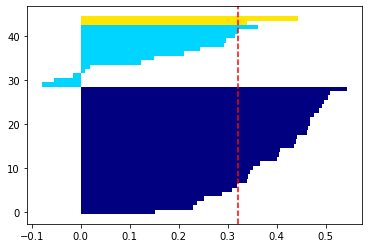

3 Clusters: Average silhouette width: 0.320


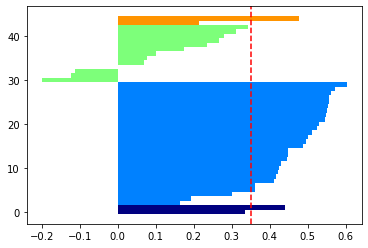

4 Clusters: Average silhouette width: 0.352


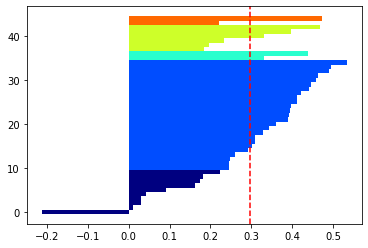

5 Clusters: Average silhouette width: 0.298


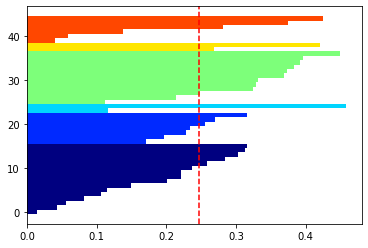

6 Clusters: Average silhouette width: 0.247


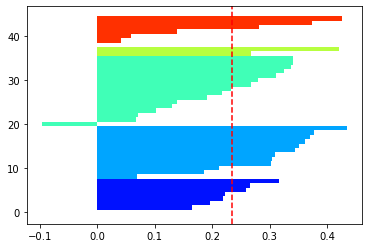

7 Clusters: Average silhouette width: 0.234


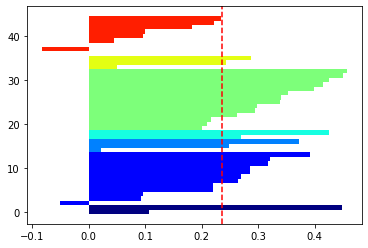

8 Clusters: Average silhouette width: 0.236


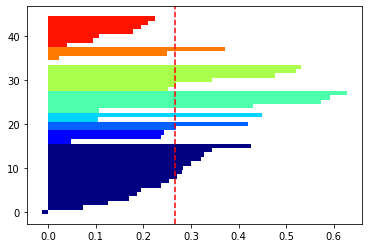

9 Clusters: Average silhouette width: 0.266


In [4]:
# エルボー法
distortions = []
for n in range(1, 11):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)

sns.lineplot(x=range(1, 11), y=distortions, marker='o')
plt.xlabel('mumber of clusters')
plt.show()

# シルエット分析
def silhouette(n):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X)
    cluster_labels = set(model.labels_)
    n_clusters = len(cluster_labels)
    silhouette_vals = silhouette_samples(X, model.labels_, metric='euclidean')
    y_lower, y_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[model.labels_ == c]
        c_silhouette_vals.sort()
        y_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0,
                 edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.show()
    print('{} Clusters: Average silhouette width: {:.3f}'.format(n, silhouette_avg))

for n in range(2, 10):
    silhouette(n)

In [5]:
# K-means によるクラスタリング
# クラスタ数2の場合
model2 = KMeans(n_clusters=2)
model2.fit(X)
# 各クラスタの要素をアウトプット
for n in range(0, 2):
    print('クラスタ{}：{}'.format(n, list(X[model2.labels_==n].index)))
    
# クラスタ数3の場合
model3 = KMeans(n_clusters=3)
model3.fit(X)
# 各クラスタの要素をアウトプット
for n in range(0, 3):
    print('クラスタ{}：{}'.format(n, list(X[model3.labels_==n].index)))

# クラスタ数4の場合
model4 = KMeans(n_clusters=4)
model4.fit(X)
# 各クラスタの要素をアウトプット
for n in range(0, 4):
    print('クラスタ{}：{}'.format(n, list(X[model4.labels_==n].index)))

クラスタ0：['Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Niigata', 'Nagano', 'Tokyo', 'Yamanashi', 'Toyama', 'Kyoto', 'Osaka']
クラスタ1：['Fukushima', 'Ibaraki', 'Tochigi', 'Saitama', 'Chiba', 'Kanagawa', 'Ishikawa', 'Fukui', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 'Shiga', 'Hyogo', 'Nara', 'Wakayama', 'Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima']
クラスタ0：['Fukushima', 'Ibaraki', 'Tochigi', 'Saitama', 'Nagano', 'Chiba', 'Kanagawa', 'Ishikawa', 'Fukui', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 'Shiga', 'Kyoto', 'Hyogo', 'Nara', 'Wakayama', 'Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima']
クラスタ1：['Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Niigata', 'Toyama', 'Osaka', 'Kochi']
クラスタ2：['Tokyo', 'Yamanashi']
クラスタ0：['Miyazaki', 'Kag

### 2.2.4 考察

- 階層的、非階層的クラスタ分析の結果について考察

#### 階層的クラスタリング

小さなクラスタ形成を見るための最大非類似度を用いたデンドログラムと、
分類感度の高いウォード法のデンドログラムを用いて階層的クラスタリングを行った。

最大非類似度では
+ [Yamanashi, Tokyo]： ワイン、ウイスキーが非常に好きで、連続的蒸留焼酎をそれなりに飲む人が多い,
+ [Kagoshima, Miyazaki]：　単式蒸留焼酎が非常に好きで、発泡酒をそれなりに飲む人が多い,
+ それ以外

の3つのクラスタに分類できそうである。

ウォード法では
+ [Shizuoka ~ Nara]: あまり消費量が多くない
+ [Kagoshima]: 単式蒸留焼酎にこだわる鹿児島
+ [Kyoto ~ Yamagata]: 焼酎以外のお酒をよく飲むグループ
の3つのクラスタに分類できそうである。

#### 非階層的クラスタリング

エルボー法ではクラスタ数2、シルエット分析では2 or 4が分類精度が高そうに見える
シルエット係数が最も高いクラスタ数4を採用すると、

+ クラスタ0：['Fukushima', 'Ibaraki', 'Tochigi', 'Saitama', 'Chiba', 'Kanagawa', 'Ishikawa', 'Fukui', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 'Shiga', 'Hyogo', 'Nara', 'Wakayama', 'Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita']
    + 飲み方にあまり偏りがないグループ。
+ クラスタ1：['Miyagi', 'Nagano', 'Tokyo', 'Yamanashi', 'Kyoto', 'Osaka']
    + ワイン消費が多いグループ。ビールも次いで多い。山梨はブドウ生産量が多く、ワインの消費量が多い。付随して隣県の長野や東京への流通が多い。
+ クラスタ2：['Hokkaido', 'Aomori', 'Iwate', 'Akita', 'Yamagata', 'Niigata', 'Toyama', 'Kochi']
    + 米どころであり日本酒の消費が多い。
    + 意外にも連続式蒸留焼酎に関しては東北の消費量が多い。日本酒が高価なため、気安く飲むために普及した。また、寒すぎて、温めるための高濃度なアルコールを効率よく生産できるように連続式蒸留焼酎が普及した。
    + 高知は発泡酒とリキュールの消費の仕方が似ていたため分類された。
+ クラスタ3：['Miyazaki', 'Kagoshima']
    + 単式蒸留焼酎の消費量で分類されたと考えられる。